In [0]:
# load the data
import pickle
data = pickle.load(open('./data/VNTC_data.pkl', 'rb'))
print(len(data),len(set(i for i in data)))

61671 60120


In [0]:
data[10]

'Phát hiện nhiều xe máy nhái nhãn hiệu Honda\nNgày 2/1, Quản lý thị trường Hà Nội phát hiện Công ty Quan hệ quốc tế và đầu tư sản xuất (số 785 Trương Định) tổ chức lắp ráp hơn 120 xe máy có kiểu dáng y hệt xe Wave của hãng Honda, được bảo hộ độc quyền ở VN. Kiểm tra một số cơ sở khác, cơ quan chức năng cũng tìm thấy nhiều xe máy nhái nhãn hiệu này.\nQuản lý thị trường thành phố đã lập biên bản thu giữ 2 trong số những xe máy được phát hiện tại Công ty Quan hệ quốc tế và đầu tư sản xuất, đồng thời gấp rút hoàn chỉnh hồ sơ xử lý vụ việc theo pháp luật.\nTrước đó hơn 1 tuần, cảnh sát kinh tế Công an thành phố Hà Nội cũng phát hiện tại nhà số 108 Nguyễn Văn Cừ đang lắp ráp hàng chục xe máy giả nhãn hiệu Wave của hãng Honda. Tang vật thu giữ gồm 27 xe máy đã lắp ráp hoàn chỉnh, 26 xe đang lắp ráp trên dây chuyền và 58 bộ linh kiện. Lô hàng được thực hiện theo đơn đặt hàng của Công ty thương mại Hợp Thành, 342 Khâm Thiên, và có tới 900 xe đã được tung ra thị trường.\nTháng 5-6/2003, công an 

In [0]:
# extract Latin- characters only
alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'
training_data=[]
for i in data:
  i=i.replace("\n",".")
  sentences=i.split(".")
  for j in sentences:
      if len(j.split()) > 2 and re.match(alphabet, j.lower()):
          training_data.append(j)
print(len(training_data))

1148703


In [0]:
del data

In [0]:
print(training_data[-10:])

[' Nếu một doanh nghiệp đưa ra mức lương cao quá hoặc thấp quá so với mặt bằng chung, chúng tôi sẽ phải đặt dấu hỏi và tìm cách trả lời câu hỏi đó bằng các cuộc điều tra riêng của công ty', ' Có thể bằng cách trắc nghiệm hoặc trực tiếp điều tra', ' Tuy nhiên, để có lợi cho mình, chính doanh nghiệp cũng cần đưa ra những thông tin chính xác', 'Gửi tiền vào dễ nhưng rút ra khó', 'Dịch vụ tiết kiệm hỗn hợp của Eximbank là sự phối hợp giữa tiết kiệm có kỳ hạn và không kỳ hạn, cho phép người gửi tiền có thể gửi vào hay rút tiền ra bất cứ lúc nào, có thể chuyển khoản hoặc thanh toán, lãi suất huy động cao hơn lãi suất không kỳ hạn', 'Tuy nhiên, Quyết định 1160 của Ngân hàng Nhà nước ghi rõ khách hàng rút tiền trước hạn phải thông báo trước cho ngân hàng, nếu không thông báo phải nộp một khoản phí bên cạnh việc khoản tiền rút trước hạn chỉ được tính lãi suất không kỳ hạn', ' Một cán bộ của ngân hàng Nhà nước giải thích rằng quy định này nhằm hạn chế việc khách rút tiền trước hạn, gây khó khăn 

In [0]:
!pip install unidecode # this module removes tones

     |████████████████████████████████| 245kB 49.9MB/s 


In [0]:
import re
import numpy as np
from unidecode import unidecode
# some common Vietnamese spell mistake
letters=list("abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
letters2=list("abcdefghijklmnopqrstuvwxyz")

typo={"ă":"aw","â":"aa","á":"as","à":"af","ả":"ar","ã":"ax","ạ":"aj","ắ":"aws","ổ":"oor","ỗ":"oox","ộ":"ooj","ơ":"ow",
"ằ":"awf","ẳ":"awr","ẵ":"awx","ặ":"awj","ó":"os","ò":"of","ỏ":"or","õ":"ox","ọ":"oj","ô":"oo","ố":"oos","ồ":"oof",
"ớ":"ows","ờ":"owf","ở":"owr","ỡ":"owx","ợ":"owj","é":"es","è":"ef","ẻ":"er","ẽ":"ex","ẹ":"ej","ê":"ee","ế":"ees","ề":"eef",
"ể":"eer","ễ":"eex","ệ":"eej","ú":"us","ù":"uf","ủ":"ur","ũ":"ux","ụ":"uj","ư":"uw","ứ":"uws","ừ":"uwf","ử":"uwr","ữ":"uwx",
"ự":"uwj","í":"is","ì":"if","ỉ":"ir","ị":"ij","ĩ":"ix","ý":"ys","ỳ":"yf","ỷ":"yr","ỵ":"yj","đ":"dd",
"Ă":"Aw","Â":"Aa","Á":"As","À":"Af","Ả":"Ar","Ã":"Ax","Ạ":"Aj","Ắ":"Aws","Ổ":"Oor","Ỗ":"Oox","Ộ":"Ooj","Ơ":"Ow",
"Ằ":"AWF","Ẳ":"Awr","Ẵ":"Awx","Ặ":"Awj","Ó":"Os","Ò":"Of","Ỏ":"Or","Õ":"Ox","Ọ":"Oj","Ô":"Oo","Ố":"Oos","Ồ":"Oof",
"Ớ":"Ows","Ờ":"Owf","Ở":"Owr","Ỡ":"Owx","Ợ":"Owj","É":"Es","È":"Ef","Ẻ":"Er","Ẽ":"Ex","Ẹ":"Ej","Ê":"Ee","Ế":"Ees","Ề":"Eef",
"Ể":"Eer","Ễ":"Eex","Ệ":"Eej","Ú":"Us","Ù":"Uf","Ủ":"Ur","Ũ":"Ux","Ụ":"Uj","Ư":"Uw","Ứ":"Uws","Ừ":"Uwf","Ử":"Uwr","Ữ":"Uwx",
"Ự":"Uwj","Í":"Is","Ì":"If","Ỉ":"Ir","Ị":"Ij","Ĩ":"Ix","Ý":"Ys","Ỳ":"Yf","Ỷ":"Yr","Ỵ":"Yj","Đ":"Dd"}

region={"ẻ":"ẽ","ẽ":"ẻ","ũ":"ủ","ủ":"ũ","ã":"ả","ả":"ã","ỏ":"õ","õ":"ỏ","i":"j"}
region2={"s":"x","l":"n","n":"l","x":"s","d":"gi","S":"X","L":"N","N":"L","X":"S","Gi":"D","D":"Gi"}

vowel=list("aeiouyáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵ")
acronym={"không":"ko"," anh":" a","em":"e","biết":"bít","giờ":"h","gì":"j","muốn":"mún","học":"hok","yêu":"iu",
         "chồng":"ck","vợ":"vk"," ông":" ô","được":"đc","tôi":"t",
         "Không":"Ko"," Anh":" A","Em":"E","Biết":"Bít","Giờ":"H","Gì":"J","Muốn":"Mún","Học":"Hok","Yêu":"Iu",
         "Chồng":"Ck","Vợ":"Vk"," Ông":" Ô","Được":"Đc","Tôi":"T",}

teen={"ch":"ck","ph":"f","th":"tk","nh":"nk",
      "Ch":"Ck","Ph":"F","Th":"Tk","Nh":"Nk"}

In [0]:
# function for adding mistake( noise)
def teen_code(sentence,pivot):
    random = np.random.uniform(0,1,1)[0]
    new_sentence=str(sentence)
    if random>pivot:
        for word in acronym.keys():
            if re.search(word, new_sentence):
                random2 = np.random.uniform(0,1,1)[0]
                if random2 <0.5:
                    new_sentence=new_sentence.replace(word,acronym[word])
        for word in teen.keys(): 
            if re.search(word, new_sentence):
                random3 = np.random.uniform(0,1,1)[0]
                if random3 <0.05:
                    new_sentence=new_sentence.replace(word,teen[word])        
        return new_sentence
    else:
        return sentence
    

def add_noise(sentence, pivot1,pivot2):
    sentence=teen_code(sentence,0.5)
    noisy_sentence = ""
    i = 0
    while i < len(sentence):
        if sentence[i] not in letters:
            noisy_sentence+=sentence[i]
        else: 
            random = np.random.uniform(0,1,1)[0]   
            if random < pivot1:
                noisy_sentence+=(sentence[i])
            elif random<pivot2:
                if sentence[i] in typo.keys() and sentence[i] in region.keys():
                    random2=np.random.uniform(0,1,1)[0]
                    if random2<=0.4:
                        noisy_sentence+=typo[sentence[i]]
                    elif random2<0.8:
                        noisy_sentence+=region[sentence[i]]
                    elif random2<0.95 :
                        noisy_sentence+=unidecode(sentence[i])
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in typo.keys():
                    random3=np.random.uniform(0,1,1)[0]
                    if random3<=0.6:
                        noisy_sentence+=typo[sentence[i]]
                    elif random3<0.9 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in region.keys():
                    random4=np.random.uniform(0,1,1)[0]
                    if random4<=0.6:
                        noisy_sentence+=region[sentence[i]]
                    elif random4<0.85 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif i<len(sentence)-1 :
                    if sentence[i] in region2.keys() and (i==0 or sentence[i-1] not in letters) and sentence[i+1] in vowel:
                        random5=np.random.uniform(0,1,1)[0]
                        if random5<=0.9:
                            noisy_sentence+=region2[sentence[i]]
                        else:
                            noisy_sentence+=sentence[i]
                    else:
                        noisy_sentence+=sentence[i]

            else:
                new_random = np.random.uniform(0,1,1)[0]
                if new_random <=0.33:
                    if i == (len(sentence) - 1):
                        continue
                    else:
                        noisy_sentence+=(sentence[i+1])
                        noisy_sentence+=(sentence[i])
                        i += 1
                elif new_random <= 0.66:
                    random_letter = np.random.choice(letters2, 1)[0]
                    noisy_sentence+=random_letter
                else:
                    pass
      
        i += 1
    return noisy_sentence


In [0]:
def extract_phrases(text):
    return re.findall(r'\w[\w ]+', text)

In [0]:
import itertools
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in training_data)
phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
print(phrases[-10:])


2727033
['gây khó khăn cho các ngân hàng', 'Tuy nhiên', 'theo một số ngân hàng thương mại', 'có rất ít các trường hợp khách rút tiền trước hạn', 'Do vậy', 'hiệu quả của quyết định này chưa thấy đâu', 'nhưng trước mắt đã gây cho người gửi tiền tâm lý', 'gửi tiền vào ngân hàng thì dễ', 'rút ra thì khó', 'Điều này hạn chế rất nhiều những nỗ lực huy động vốn của các ngân hàng']


In [0]:
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

# divide document into 5-grams 
# a single Vietnamese word cant contain more than 7 characters ( nghiêng )
NGRAM = 5 
MAXLEN = 40
def gen_ngrams(words, n=5):
    return ngrams(words.split(), n)
   
list_ngrams = []
for p in tqdm(phrases):
  if not re.match(alphabet, p.lower()):
    continue
  for ngr in gen_ngrams(p, NGRAM):
    if len(" ".join(ngr)) < MAXLEN:
      list_ngrams.append(" ".join(ngr))

  0%|          | 0/2727033 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: generator 'ngrams' raised StopIteration
  del sys.path[0]
100%|██████████| 2727033/2727033 [00:27<00:00, 99057.92it/s]


In [0]:
del phrases
list_ngrams = list((list_ngrams))
print(len(list_ngrams))

16467058


In [0]:
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
print(alphabet)
print(len(alphabet))

['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
1

In [0]:
# So a 5-grams contain at most 7*5 = 35 character (except one that has spell mistake)
# add "\x00" padding at the end of 5-grams in order to equal their length
def encoder_data(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x
      
def decoder_data(x):
    x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)

In [0]:
print(encoder_data("Tôi tên là việt hoàng").shape)
print(decoder_data(encoder_data("Tôi tên là Việt Hoàng")))

(40, 199)
 Tôi tên là Việt Hoàng                  


In [0]:
# Build the neural network
# this is adapted from the seq2seq architecture, which can be used for Machine Translation, Text Summarization Image Captioning ...
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense,LSTM, Bidirectional
from keras.callbacks import Callback, ModelCheckpoint
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
encoder=LSTM(256,input_shape=(MAXLEN, len(alphabet)), return_sequences=True)

In [0]:
decoder=Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))

In [0]:
model=Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 256)           466944    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 512)           1050624   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 256)           131328    
_________________________________________________________________
activation_1 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 199)           51143     
_________________________________________________________________
activation_2 (Activation)    (None, 40, 199)           0         
Total params: 1,700,039
Trainable params: 1,700,039
Non-trainable params: 0
__________________________________________

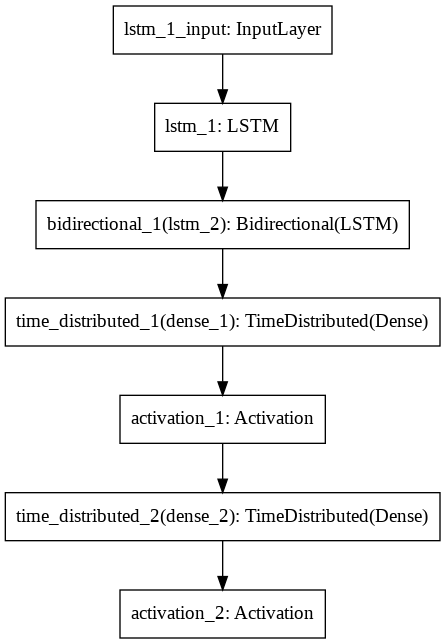

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=42)

In [0]:
del list_ngrams

In [0]:
# we have to use data- generation medthod cause this dataset is too large to fit into memory
BATCH_SIZE = 512
def generate_data(data, batch_size):
    cur_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):  
            y.append(encoder_data(data[cur_index]))
            x.append(encoder_data(add_noise(data[cur_index],0.94,0.985)))
            cur_index += 1
            if cur_index > len(data)-1:
                cur_index = 0
        yield np.array(x), np.array(y)

In [0]:
import os
train_generator = generate_data(train_data, batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data, batch_size=BATCH_SIZE)

In [0]:
# train the model and save to the Model folder
checkpointer = ModelCheckpoint(filepath=os.path.join(./model/spell_{val_acc:.2f}.h5'), save_best_only=True, verbose=1)
model.fit_generator(train_generator, steps_per_epoch=len(train_data)//BATCH_SIZE, epochs=10,
                    validation_data=validation_generator, validation_steps=len(valid_data)//BATCH_SIZE,
                    callbacks=[checkpointer])